In [92]:
import pickle
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

all_res_files = sorted(glob('result/bMMA4/*.pkl'), key=lambda x: int(x.split('_')[-1].split('.')[0]))

In [93]:
def load_data(file):
    with open(file, 'rb') as f:
        data = pickle.load(f)
    return data

all_res_data = [load_data(all_res_files[i]) for i in range(len(all_res_files)) if i % 40 == 0]

In [94]:
# pickle.dump(all_res_data, open('result/sty1/all_res_data.pkl', 'wb'))

In [95]:
M_mass = all_res_data[0]['M0']

t_array = np.array([data['t'] for data in all_res_data])
conversion_array = np.array([1 - data['M0'] / M_mass for data in all_res_data])
R_concentration_array = np.array([np.array(data['R_arr']).sum() for data in all_res_data])

def get_polyG_n_array(data):
    P_arr = np.array(data)
    idx_arr = np.linspace(1, len(P_arr), len(P_arr)).astype(int)
    return np.dot(idx_arr, P_arr) / np.sum(P_arr)

polyG_n_array = np.array([get_polyG_n_array(data['P_arr']) for data in all_res_data])

/tmp/ipykernel_23572/3105492603.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(idx_arr, P_arr) / np.sum(P_arr)


In [96]:
# apply smoothing to conversion_array and R_concentration_array
def smooth(data, window_size=1):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')
conversion_array_smooth = smooth(conversion_array)
R_concentration_array_smooth = smooth(R_concentration_array)
polyG_n_array_smooth = smooth(polyG_n_array)

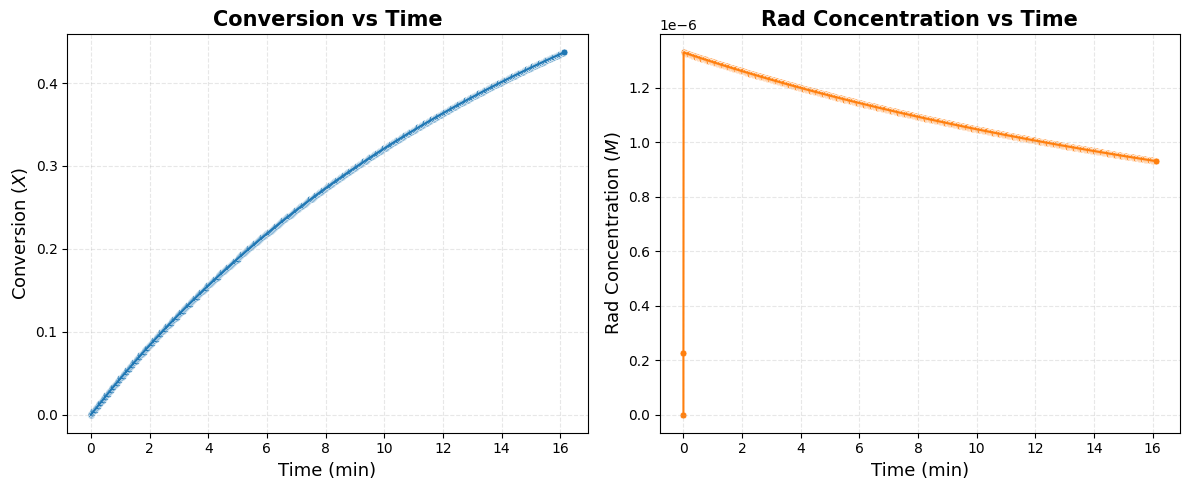

In [97]:
# # show conversion array and R concentration array against time
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.plot(t_array, conversion_array_smooth, 'o-')
# plt.xlabel('Time (min)')
# plt.ylabel(r'Conversion $(X)$')
# plt.title('Conversion vs Time')
# plt.subplot(1, 2, 2)
# plt.plot(t_array, R_concentration_array_smooth, 'o-')
# plt.xlabel('Time (min)')
# plt.ylabel('Rad Concentration')
# plt.title('Rad Concentration vs Time')
# plt.tight_layout()
# # plt.savefig('conversion_R_concentration.png')
# plt.show()

import matplotlib.pyplot as plt
import numpy as np


# Create the improved plot with smaller points and better styling
plt.figure(figsize=(12, 5))

# First subplot - Conversion vs Time
plt.subplot(1, 2, 1)
plt.plot(t_array, conversion_array_smooth, '-', color='#1f77b4', linewidth=1.5)  # Line only
plt.scatter(t_array, conversion_array_smooth, s=25, color='#1f77b4', edgecolor='white', linewidth=0.5)  # Points with white edge
plt.xlabel('Time (min)', fontsize=13)
plt.ylabel(r'Conversion $(X)$', fontsize=13)
plt.title('Conversion vs Time', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

# Second subplot - Rad Concentration vs Time
plt.subplot(1, 2, 2)
plt.plot(t_array, R_concentration_array_smooth, '-', color='#ff7f0e', linewidth=1.5)  # Line only
plt.scatter(t_array, R_concentration_array_smooth, s=25, color='#ff7f0e', edgecolor='white', linewidth=0.5)  # Points with white edge
plt.xlabel('Time (min)', fontsize=13)
plt.ylabel(r'Rad Concentration $(M)$', fontsize=13)
plt.title('Rad Concentration vs Time', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
# plt.savefig('conversion_R_concentration.png')  # Uncomment to save the figure
plt.show()

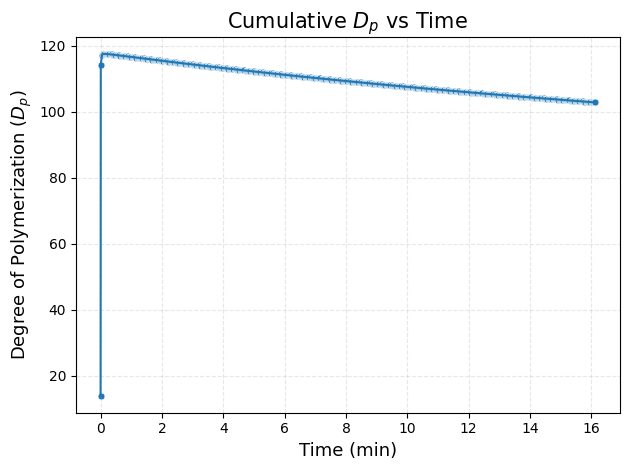

In [98]:
# # show polyG_n array against time
# plt.figure(figsize=(5, 5))
# plt.plot(t_array, polyG_n_array_smooth, 'o-')
# plt.xlabel('Time (s)')
# plt.ylabel('PolyG_n')
# plt.title('PolyG_n vs Time')
# plt.tight_layout()
# # plt.savefig('polyG_n.png')
# plt.show()

plt.plot(t_array, polyG_n_array_smooth, '-', color='#1f77b4', linewidth=1.5)  # Line only
plt.scatter(t_array, polyG_n_array_smooth, s=25, color='#1f77b4', edgecolor='white', linewidth=0.5)  # Points with white edge
plt.xlabel('Time (min)', fontsize=13)
plt.ylabel(r'Degree of Polymerization $(D_p)$', fontsize=13)
plt.title(r'Cumulative $D_p$ vs Time', fontsize=15)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

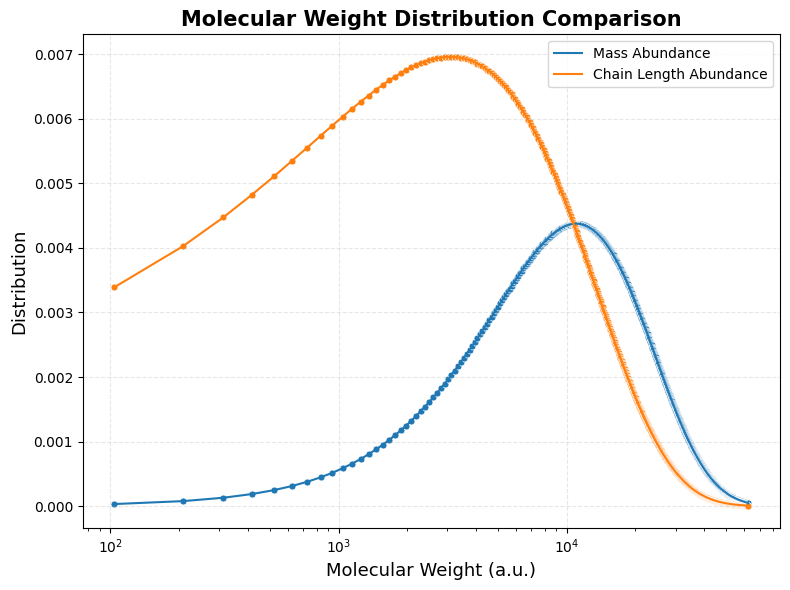

In [99]:
mol_weight = 104.12

P_arr = all_res_data[-1]['P_arr']
Pw_arr = np.power(np.linspace(1, len(P_arr), len(P_arr)), 1) * P_arr / np.sum(P_arr)
Pw_arr_smooth = smooth(Pw_arr)
X_arr = np.linspace(1, len(P_arr), len(P_arr)) * mol_weight

# Create figure and axis for the combined plot
plt.figure(figsize=(8, 6))

# Number abundance distribution (w=1)
Pw_arr_number = np.power(np.linspace(1, len(P_arr), len(P_arr)), 1) * P_arr / np.sum(np.power(np.linspace(1, len(P_arr), len(P_arr)), 1) * P_arr)
Pw_arr_number_smooth = smooth(Pw_arr_number)

# Mass abundance distribution (w=0)
Pw_arr_mass = np.power(np.linspace(1, len(P_arr), len(P_arr)), 0) * P_arr / np.sum(np.power(np.linspace(1, len(P_arr), len(P_arr)), 0) * P_arr)
Pw_arr_mass_smooth = smooth(Pw_arr_mass)

# Plot number distribution
plt.plot(X_arr, Pw_arr_number_smooth, '-', color='#1f77b4', linewidth=1.5, label='Mass Abundance')
plt.scatter(X_arr, Pw_arr_number_smooth, s=25, color='#1f77b4', edgecolor='white', linewidth=0.5)

# Plot mass distribution
plt.plot(X_arr, Pw_arr_mass_smooth, '-', color='#ff7f0e', linewidth=1.5, label='Chain Length Abundance')
plt.scatter(X_arr, Pw_arr_mass_smooth, s=25, color='#ff7f0e', edgecolor='white', linewidth=0.5)

# Set labels and title
plt.xlabel('Molecular Weight (a.u.)', fontsize=13)
plt.ylabel('Distribution', fontsize=13)
plt.title('Molecular Weight Distribution Comparison', fontsize=15, fontweight='bold')

# Add grid, legend and set log scale
plt.grid(True, alpha=0.3, linestyle='--')
plt.xscale('log')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [100]:
def get_wx_Markov(X_arr, A, P):
    # w_x &= Ax(1 - p)^2 p^{x-1} + \frac{1}{2}(1 - A)x(1 - p)^3 (x - 1)p^{x-2}
    return A * X_arr * (1 - P) ** 2 * P ** (X_arr - 1) + 0.5 * (1 - A) * X_arr * (1 - P) ** 3 * (X_arr-1) * P ** (X_arr - 2)

def get_Nx_Markov(X_arr, A, P):
    # \underline{N}_x &= A(1 - p) p^{x-1} + \frac{1}{2}(1 - A)(1 - p)^2 (x - 1)p^{x-2}
    return A * (1 - P) * P ** (X_arr - 1) + 0.5 * (1 - A) * (1 - P) ** 2 * (X_arr-1) * P ** (X_arr - 2)

In [105]:
mol_weight = 104.12
T = 90 + 273.15
# from Sty_AIBN_param import get_kp, get_kt, get_ktd_ratio, get_kfm
from MMA_AIBN_param import get_kp, get_kt, get_ktd_ratio, get_kfm

max_n = 600
R_conc = np.array(all_res_data[-1]['R_arr']).sum()
M_conc = all_res_data[-1]['M0']
kp = get_kp(T)
kt = get_kt(T)
ktd_ratio = get_ktd_ratio(T)
kfm = get_kfm(T)

markov_P = kp * M_conc / (kp * M_conc + kt * R_conc + kfm)

X = np.linspace(1, len(P_arr), len(P_arr))
X_arr = np.linspace(1, len(P_arr), len(P_arr)) * mol_weight
Nx_arr = get_Nx_Markov(X, ktd_ratio, markov_P)
wx_arr = get_wx_Markov(X, ktd_ratio, markov_P)
Nx_arr = Nx_arr / np.sum(Nx_arr)
wx_arr = wx_arr / np.sum(wx_arr)

# Flory distribution
tau = kt * R_conc / (kp * M_conc)
f0_tau = tau * np.exp(-tau * X)
f1_tau = tau**2 * X * np.exp(-tau * X)
f2_tau = tau**3 * X**2 * np.exp(-tau * X)

Nx_flory_arr = (ktd_ratio * f0_tau + .5 * f1_tau) / (ktd_ratio + .5)
wx_flory_arr = (ktd_ratio * f1_tau + .5 * f2_tau) / (ktd_ratio + .5) 
Nx_flory_arr = Nx_flory_arr / np.sum(Nx_flory_arr)
wx_flory_arr = wx_flory_arr / np.sum(wx_flory_arr)


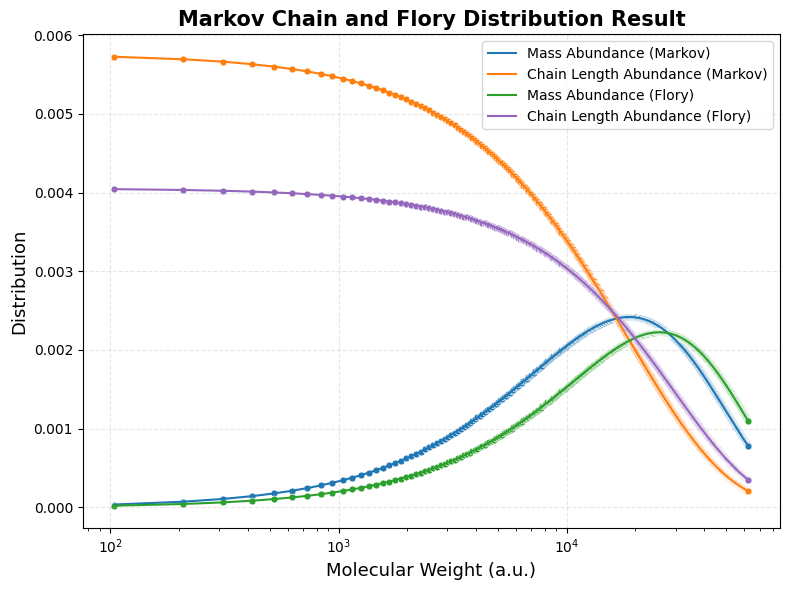

In [106]:
# Create figure and axis for the combined plot
plt.figure(figsize=(8, 6))

# Plot number distribution
plt.plot(X_arr, wx_arr, '-', color='#1f77b4', linewidth=1.5, label='Mass Abundance (Markov)')
plt.scatter(X_arr, wx_arr, s=25, color='#1f77b4', edgecolor='white', linewidth=0.5)

# Plot mass distribution  
plt.plot(X_arr, Nx_arr, '-', color='#ff7f0e', linewidth=1.5, label='Chain Length Abundance (Markov)')
plt.scatter(X_arr, Nx_arr, s=25, color='#ff7f0e', edgecolor='white', linewidth=0.5)

# Plot number distribution (Flory) - changed colors to green
plt.plot(X_arr, wx_flory_arr, '-', color='#2ca02c', linewidth=1.5, label='Mass Abundance (Flory)')
plt.scatter(X_arr, wx_flory_arr, s=25, color='#2ca02c', edgecolor='white', linewidth=0.5)

# Plot mass distribution (Flory) - changed colors to purple
plt.plot(X_arr, Nx_flory_arr, '-', color='#9467bd', linewidth=1.5, label='Chain Length Abundance (Flory)')
plt.scatter(X_arr, Nx_flory_arr, s=25, color='#9467bd', edgecolor='white', linewidth=0.5)

# Set labels and title
plt.xlabel('Molecular Weight (a.u.)', fontsize=13)
plt.ylabel('Distribution', fontsize=13)
plt.title('Markov Chain and Flory Distribution Result', fontsize=15, fontweight='bold')

# Add grid, legend and set log scale
plt.grid(True, alpha=0.3, linestyle='--')
plt.xscale('log')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

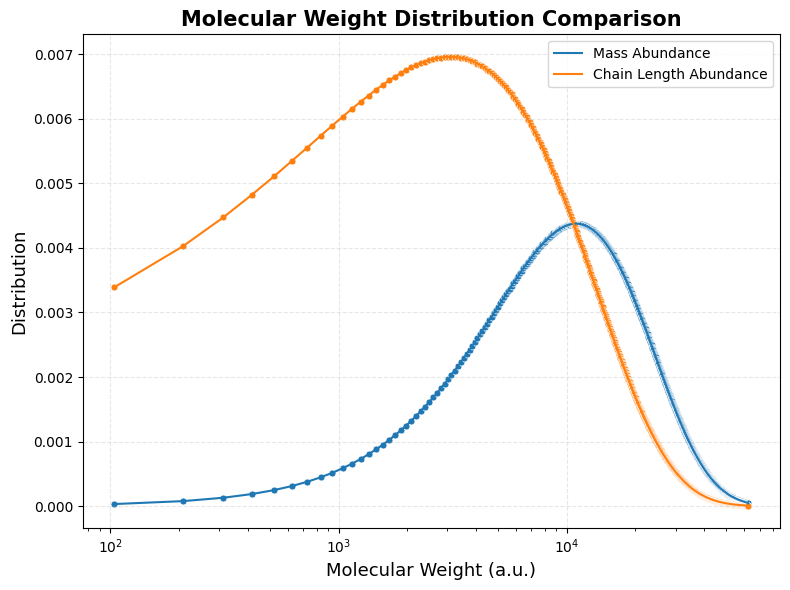

In [103]:




# Create figure and axis for the combined plot
plt.figure(figsize=(8, 6))

# Number abundance distribution (w=1)
Pw_arr_number = np.power(np.linspace(1, len(P_arr), len(P_arr)), 1) * P_arr / np.sum(np.power(np.linspace(1, len(P_arr), len(P_arr)), 1) * P_arr)
Pw_arr_number_smooth = smooth(Pw_arr_number)

# Mass abundance distribution (w=0)
Pw_arr_mass = np.power(np.linspace(1, len(P_arr), len(P_arr)), 0) * P_arr / np.sum(np.power(np.linspace(1, len(P_arr), len(P_arr)), 0) * P_arr)
Pw_arr_mass_smooth = smooth(Pw_arr_mass)

# Plot number distribution
plt.plot(X_arr, Pw_arr_number_smooth, '-', color='#1f77b4', linewidth=1.5, label='Mass Abundance')
plt.scatter(X_arr, Pw_arr_number_smooth, s=25, color='#1f77b4', edgecolor='white', linewidth=0.5)

# Plot mass distribution
plt.plot(X_arr, Pw_arr_mass_smooth, '-', color='#ff7f0e', linewidth=1.5, label='Chain Length Abundance')
plt.scatter(X_arr, Pw_arr_mass_smooth, s=25, color='#ff7f0e', edgecolor='white', linewidth=0.5)

# Set labels and title
plt.xlabel('Molecular Weight (a.u.)', fontsize=13)
plt.ylabel('Distribution', fontsize=13)
plt.title('Molecular Weight Distribution Comparison', fontsize=15, fontweight='bold')

# Add grid, legend and set log scale
plt.grid(True, alpha=0.3, linestyle='--')
plt.xscale('log')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [104]:
mol_weight = 104.12
Mn = np.sum(P_arr * np.linspace(1, len(P_arr), len(P_arr))) / np.sum(P_arr) * mol_weight
Mw = np.sum(P_arr * np.power(np.linspace(1, len(P_arr), len(P_arr)), 2)) / np.sum(P_arr * np.linspace(1, len(P_arr), len(P_arr))) * mol_weight

print(f'Mn: {Mn:.0f}, Mw: {Mw:.0f}, Mw/Mn: {Mw/Mn :.2f}')

Mn: 10702, Mw: 18006, Mw/Mn: 1.68
